In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values

In [5]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder_X_2 = LabelEncoder()

X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])

In [12]:
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(columnTransformer.fit_transform(X), dtype = np.str)
X = X[:, 1:]

In [10]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [11]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

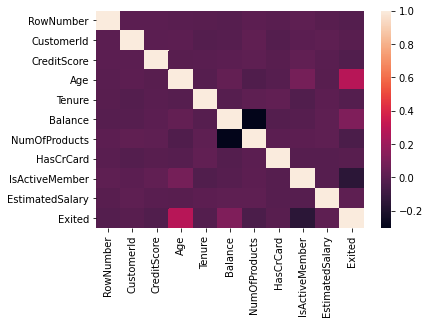

In [14]:
crr=dataset.corr()
sns.heatmap(crr)

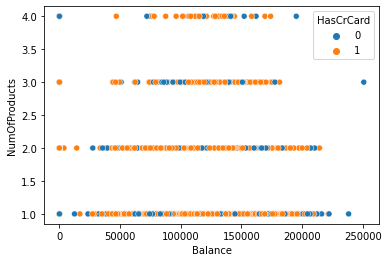

In [20]:
sns.scatterplot(x='Balance',y='NumOfProducts',data=dataset,hue='HasCrCard')

In [21]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [22]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [23]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [24]:
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100,validation_data=(X_test,y_test))

Epoch 1/100
800/800 [==============================] - 2s 2ms/step - loss: 0.5501 - accuracy: 0.7895 - val_loss: 0.4287 - val_accuracy: 0.7975
Epoch 2/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4301 - accuracy: 0.7970 - val_loss: 0.4207 - val_accuracy: 0.7975
Epoch 3/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4161 - accuracy: 0.7978 - val_loss: 0.4182 - val_accuracy: 0.8300
Epoch 4/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4131 - accuracy: 0.8267 - val_loss: 0.4135 - val_accuracy: 0.8320
Epoch 5/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4160 - accuracy: 0.8297 - val_loss: 0.4103 - val_accuracy: 0.8360
Epoch 6/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4132 - accuracy: 0.8297 - val_loss: 0.4100 - val_accuracy: 0.8390
Epoch 7/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3981 - accuracy: 0.8381 - val_loss: 0.4076 - val_accuracy: 0.8355

In [25]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [26]:
new_prediction = classifier.predict(sc.transform(np.array([[0.0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])))
new_prediction = (new_prediction > 0.5)

In [27]:
new_prediction

array([[False]])

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [29]:
cm

array([[1537,   58],
       [ 260,  145]])